# Import all libraries

Import pandas to create a dataframe

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Import train, test split and all other libraries

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


Import all algorithms

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import xgboost as xg

Import all evaluation metrics

In [ ]:
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# There are 2 types of features we have

Create a dataframe with 9 columns (Type 1)

In [ ]:
df = pd.read_csv('Loan_default_Selected_8_features.csv')
df.head()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,InterestRate,DTIRatio,LoanTerm,Default
0,56,85994,50587,520,80,15.23,0.44,36,0
1,69,50432,124440,458,15,4.81,0.68,60,0
2,46,84208,129188,451,26,21.17,0.31,24,1
3,32,31713,44799,743,0,7.07,0.23,24,0
4,60,20437,9139,633,8,6.51,0.73,48,0


In [ ]:
df.shape

(451388, 9)

In [ ]:
df.isnull().sum()

,0
Age,0
Income,0
LoanAmount,0
CreditScore,0
MonthsEmployed,0
InterestRate,0
DTIRatio,0
LoanTerm,0
Default,0


In [ ]:
df.describe()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,InterestRate,DTIRatio,LoanTerm,Default
count,451388.000000,451388.000000,451388.000000,451388.000000,451388.000000,451388.000000,451388.000000,451388.000000,451388.000000
mean,40.260246,77862.804118,134980.037655,567.343106,55.261323,14.535316,0.505602,35.881483,0.500000
std,14.018020,40112.412443,70749.099081,147.146102,32.154118,6.153289,0.213011,15.706709,0.500001
min,18.000000,15000.000000,5000.000000,300.000000,0.000000,2.000000,0.100000,12.000000,0.000000
25%,28.000000,41751.000000,74859.000000,445.000000,28.000000,9.670000,0.330000,24.000000,0.000000
50%,39.000000,76215.000000,138665.000000,564.000000,53.000000,15.052104,0.510000,36.000000,0.500000
75%,51.000000,112631.000000,197471.000000,687.000000,81.000000,19.707308,0.680000,48.000000,1.000000
max,69.000000,149999.000000,249999.000000,849.000000,119.000000,25.000000,0.900000,60.000000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 451388 entries, 0 to 451387
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Age             451388 non-null  int64  
 1   Income          451388 non-null  int64  
 2   LoanAmount      451388 non-null  int64  
 3   CreditScore     451388 non-null  int64  
 4   MonthsEmployed  451388 non-null  int64  
 5   InterestRate    451388 non-null  float64
 6   DTIRatio        451388 non-null  float64
 7   LoanTerm        451388 non-null  int64  
 8   Default         451388 non-null  int64  
dtypes: float64(2), int64(7)
memory usage: 31.0 MB


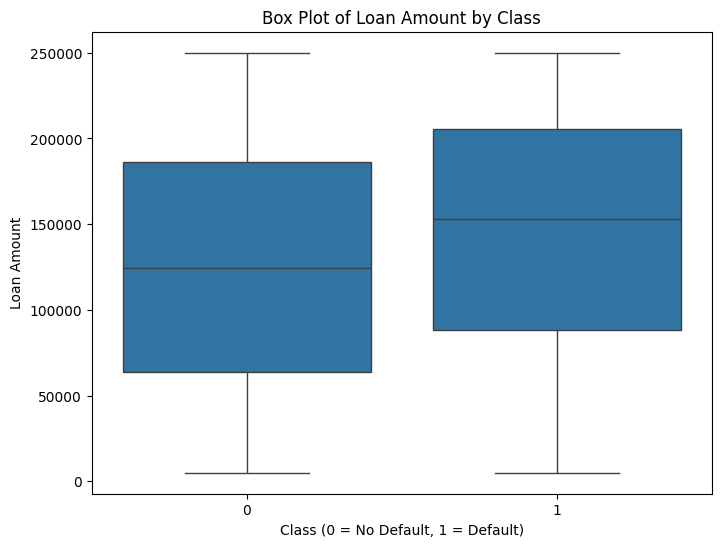

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df["Default"], y=df["LoanAmount"])
plt.title("Box Plot of Loan Amount by Class")
plt.xlabel("Class (0 = No Default, 1 = Default)")
plt.ylabel("Loan Amount")
plt.show()

In [ ]:
correlation_matrix = df.corr()
print(correlation_matrix)

                     Age    Income  LoanAmount  CreditScore  MonthsEmployed  \
Age             1.000000  0.015648   -0.020672     0.011877        0.032470   
Income          0.015648  1.000000   -0.069178     0.000302        0.007555   
LoanAmount     -0.020672 -0.069178    1.000000    -0.002188       -0.007755   
CreditScore     0.011877  0.000302   -0.002188     1.000000        0.009511   
MonthsEmployed  0.032470  0.007555   -0.007755     0.009511        1.000000   
InterestRate   -0.048235 -0.015213    0.008563    -0.007651       -0.022724   
DTIRatio       -0.011115 -0.000559    0.001969    -0.002004       -0.002496   
LoanTerm        0.000274 -0.000371   -0.000838     0.000474       -0.000597   
Default        -0.296028 -0.150486    0.136064    -0.060411       -0.171157   

                InterestRate  DTIRatio  LoanTerm   Default  
Age                -0.048235 -0.011115  0.000274 -0.296028  
Income             -0.015213 -0.000559 -0.000371 -0.150486  
LoanAmount          0.0085

In [ ]:
x = df.drop('Default', axis=1)
y = df['Default']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=10)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((315971, 8), (315971,), (135417, 8), (135417,))

StandardScaler for fast execution

In [ ]:
scaler = StandardScaler()

x_train_scaler = scaler.fit_transform(x_train)
x_test_scaler = scaler.transform(x_test)

1) Logistic Regression for 8 features

In [ ]:
lr = LogisticRegression(max_iter=1000)

lr.fit(x_train_scaler, y_train)

LogisticRegression(max_iter=1000)

Execution time : 1 min for LogisticRegression

In [ ]:
y_pred = lr.predict(x_test_scaler)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.67      0.68     67809
           1       0.68      0.71      0.69     67608

    accuracy                           0.69    135417
   macro avg       0.69      0.69      0.69    135417
weighted avg       0.69      0.69      0.69    135417



RandomForestClassifier for 8 features

In [ ]:
rfc = RandomForestClassifier()
rfc.fit(x_train_scaler, y_train)

RandomForestClassifier()

Execution time : 2 mins for RandomForestClassifier

In [ ]:
y_predic = rfc.predict(x_test_scaler)
print(classification_report(y_test, y_predic))

              precision    recall  f1-score   support

           0       0.86      0.91      0.88     67809
           1       0.90      0.85      0.88     67608

    accuracy                           0.88    135417
   macro avg       0.88      0.88      0.88    135417
weighted avg       0.88      0.88      0.88    135417



SupportVectorClassifier for 8 features

In [ ]:
svc = SVC(random_state=7, kernel='rbf')
svc.fit(x_train_scaler, y_train)

SVC(random_state=7)

In [ ]:
y_predict = svc.predict(x_test_scaler)
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.77      0.73      0.75     67809
           1       0.74      0.78      0.76     67608

    accuracy                           0.75    135417
   macro avg       0.75      0.75      0.75    135417
weighted avg       0.75      0.75      0.75    135417



XGBoost for 8 features

In [ ]:
xgc = xg.XGBClassifier(random_state=10)
xgc.fit(x_train_scaler,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [ ]:
y_prediction = xgc.predict(x_test_scaler)
print(classification_report(y_test,y_prediction))

              precision    recall  f1-score   support

           0       0.84      0.97      0.90     67809
           1       0.96      0.82      0.89     67608

    accuracy                           0.89    135417
   macro avg       0.90      0.89      0.89    135417
weighted avg       0.90      0.89      0.89    135417



In [ ]:
def eval_model(model,x_train,x_test,y_train,y_test):
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    p,r,f,s = precision_recall_fscore_support(y_test,y_pred)
    acc = accuracy_score(y_test,y_pred)
    print(model.__class__)
    print(p,r,f,s)
    print(acc)
    return p,r,f,s,acc

In [ ]:
model_list = [LogisticRegression(max_iter=1000),
              RandomForestClassifier(),
              SVC(random_state=10, kernel='rbf'),
              xg.XGBClassifier(random_state=10)
              ]

In [ ]:
pc1 = []
pc2=[]
rc1=[]
rc2=[]
fc1=[]
fc2=[]
acc_list=[]
for model in model_list:
    p,r,f,s,acc = eval_model(model,x_train_scaler,x_test_scaler,y_train,y_test)
    pc1.append(p[0])
    pc2.append(p[1])
    rc1.append(r[0])
    rc2.append(r[1])
    fc1.append(f[0])
    fc2.append(f[1])
    acc_list.append(acc)

<class 'sklearn.linear_model._logistic.LogisticRegression'>
[0.69712471 0.68317412] [0.67327346 0.70661756] [0.68499152 0.69469812] [67809 67608]
0.6899207632719674
<class 'sklearn.ensemble._forest.RandomForestClassifier'>
[0.85855789 0.90407013] [0.91011518 0.84961839] [0.88358508 0.8759989 ] [67809 67608]
0.8799116802174025
<class 'sklearn.svm._classes.SVC'>
[0.76594128 0.74025315] [0.72823666 0.77680156] [0.74661324 0.7580871 ] [67809 67608]
0.7524830708109026
<class 'xgboost.sklearn.XGBClassifier'>
[0.84440316 0.95922914] [0.96518161 0.82161874] [0.90076178 0.8851072 ] [67809 67608]
0.8935067236757571


In [ ]:
result_dict = {
    "pc1" : pc1,
    "pc2" : pc2,
    "rc1" : rc1,
    "rc2" : rc2,
    "fc1" : fc1,
    "fc2" : fc2,
    "acc" : acc_list
}

In [ ]:
# Create DF using all lists

result_df = pd.DataFrame(result_dict)

<Axes: >

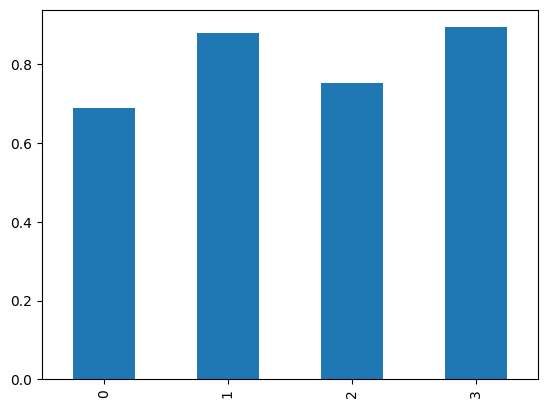

In [ ]:
result_df["acc"].plot.bar()

Create a dataframe with 14 columns (Type 2)

In [ ]:
df1 = pd.read_csv('Loan_default_Selected_13_features.csv')
df1.head()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,MaritalStatus_Divorced,HasMortgage_Yes,HasDependents_No,Default
0,56,85994,50587,520,80,4,15.23,36,0.44,1,True,True,False,0
1,69,50432,124440,458,15,1,4.81,60,0.68,2,False,False,True,0
2,46,84208,129188,451,26,3,21.17,24,0.31,2,True,True,False,1
3,32,31713,44799,743,0,3,7.07,24,0.23,0,False,False,True,0
4,60,20437,9139,633,8,4,6.51,48,0.73,1,True,False,False,0


In [ ]:
df1.shape

(451388, 14)

In [ ]:
df1.isnull().sum()

,0
Age,0
Income,0
LoanAmount,0
CreditScore,0
MonthsEmployed,0
NumCreditLines,0
InterestRate,0
LoanTerm,0
DTIRatio,0
Education,0


In [ ]:
df1.describe()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,Default
count,451388.000000,451388.000000,451388.000000,451388.000000,451388.000000,451388.000000,451388.000000,451388.000000,451388.000000,451388.000000,451388.000000
mean,40.260246,77862.804118,134980.037655,567.343106,55.261323,2.376541,14.535316,35.881483,0.505602,1.295608,0.500000
std,14.018020,40112.412443,70749.099081,147.146102,32.154118,1.045247,6.153289,15.706709,0.213011,1.050255,0.500001
min,18.000000,15000.000000,5000.000000,300.000000,0.000000,1.000000,2.000000,12.000000,0.100000,0.000000,0.000000
25%,28.000000,41751.000000,74859.000000,445.000000,28.000000,1.000000,9.670000,24.000000,0.330000,0.000000,0.000000
50%,39.000000,76215.000000,138665.000000,564.000000,53.000000,2.000000,15.052104,36.000000,0.510000,1.000000,0.500000
75%,51.000000,112631.000000,197471.000000,687.000000,81.000000,3.000000,19.707308,48.000000,0.680000,2.000000,1.000000
max,69.000000,149999.000000,249999.000000,849.000000,119.000000,4.000000,25.000000,60.000000,0.900000,3.000000,1.000000


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 451388 entries, 0 to 451387
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Age                     451388 non-null  int64  
 1   Income                  451388 non-null  int64  
 2   LoanAmount              451388 non-null  int64  
 3   CreditScore             451388 non-null  int64  
 4   MonthsEmployed          451388 non-null  int64  
 5   NumCreditLines          451388 non-null  int64  
 6   InterestRate            451388 non-null  float64
 7   LoanTerm                451388 non-null  int64  
 8   DTIRatio                451388 non-null  float64
 9   Education               451388 non-null  int64  
 10  MaritalStatus_Divorced  451388 non-null  bool   
 11  HasMortgage_Yes         451388 non-null  bool   
 12  HasDependents_No        451388 non-null  bool   
 13  Default                 451388 non-null  int64  
dtypes: bool(3), float64(

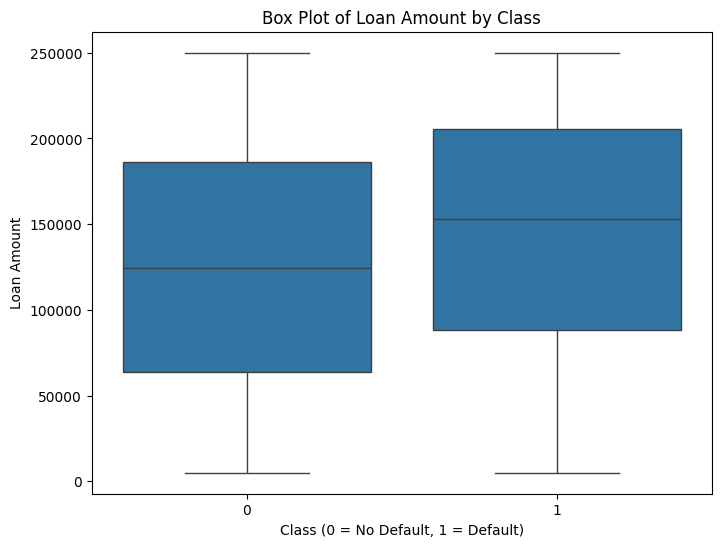

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df1["Default"], y=df1["LoanAmount"])
plt.title("Box Plot of Loan Amount by Class")
plt.xlabel("Class (0 = No Default, 1 = Default)")
plt.ylabel("Loan Amount")
plt.show()

In [ ]:
corr_matrix = df1.corr()
print(corr_matrix)

                             Age    Income  LoanAmount  CreditScore  \
Age                     1.000000  0.015648   -0.020672     0.011877   
Income                  0.015648  1.000000   -0.069178     0.000302   
LoanAmount             -0.020672 -0.069178    1.000000    -0.002188   
CreditScore             0.011877  0.000302   -0.002188     1.000000   
MonthsEmployed          0.032470  0.007555   -0.007755     0.009511   
NumCreditLines          0.038191  0.017650   -0.017820     0.009954   
InterestRate           -0.048235 -0.015213    0.008563    -0.007651   
LoanTerm                0.000274 -0.000371   -0.000838     0.000474   
DTIRatio               -0.011115 -0.000559    0.001969    -0.002004   
Education               0.055614  0.029467   -0.022153     0.008621   
MaritalStatus_Divorced -0.066515 -0.032342    0.032798    -0.009902   
HasMortgage_Yes        -0.059113 -0.032284    0.029363    -0.011977   
HasDependents_No       -0.078655 -0.034814    0.031750    -0.012340   
Defaul

In [ ]:
X = df1.drop('Default', axis=1)
Y = df1['Default']

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=10)
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((315971, 13), (315971,), (135417, 13), (135417,))

StandardScaler for fast execution

In [ ]:
stdscaler = StandardScaler()

X_train_scaler = stdscaler.fit_transform(X_train)
X_test_scaler = stdscaler.transform(X_test)

In [ ]:
lr1 = LogisticRegression(max_iter=1000)

lr1.fit(X_train_scaler, Y_train)

LogisticRegression(max_iter=1000)

In [ ]:
Y_pred = lr1.predict(X_test_scaler)
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.76      0.74      0.75     67809
           1       0.75      0.76      0.76     67608

    accuracy                           0.75    135417
   macro avg       0.75      0.75      0.75    135417
weighted avg       0.75      0.75      0.75    135417



In [ ]:
rfc1 = RandomForestClassifier()
rfc1.fit(X_train_scaler, Y_train)

RandomForestClassifier()

In [ ]:
Y_predic = rfc1.predict(X_test_scaler)
print(classification_report(Y_test, Y_predic))

              precision    recall  f1-score   support

           0       0.86      0.89      0.87     67809
           1       0.89      0.85      0.87     67608

    accuracy                           0.87    135417
   macro avg       0.87      0.87      0.87    135417
weighted avg       0.87      0.87      0.87    135417



In [ ]:
svc1 = SVC(random_state=10, kernel='rbf')
svc1.fit(X_train_scaler, Y_train)

SVC(random_state=10)

In [ ]:
Y_predict = svc1.predict(X_test_scaler)
print(classification_report(Y_test, Y_predict))

              precision    recall  f1-score   support

           0       0.80      0.81      0.80     67809
           1       0.80      0.80      0.80     67608

    accuracy                           0.80    135417
   macro avg       0.80      0.80      0.80    135417
weighted avg       0.80      0.80      0.80    135417



In [ ]:
xgc1 = xg.XGBClassifier(random_state=10)
xgc1.fit(X_train_scaler,Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [ ]:
Y_prediction = xgc1.predict(X_test_scaler)
print(classification_report(Y_test,Y_prediction))

              precision    recall  f1-score   support

           0       0.86      0.95      0.90     67809
           1       0.94      0.84      0.89     67608

    accuracy                           0.90    135417
   macro avg       0.90      0.90      0.90    135417
weighted avg       0.90      0.90      0.90    135417



In [ ]:
def eval_model(model,X_train,X_test,Y_train,Y_test):
    model.fit(X_train,Y_train)
    Y_pred = model.predict(X_test)
    p,r,f,s = precision_recall_fscore_support(Y_test,Y_pred)
    acc = accuracy_score(Y_test,Y_pred)
    print(model.__class__)
    print(p,r,f,s)
    print(acc)
    return p,r,f,s,acc

In [ ]:
model_list = [LogisticRegression(max_iter=1000),
              RandomForestClassifier(),
              SVC(random_state=10, kernel='rbf'),
              xg.XGBClassifier(random_state=10)
              ]

In [ ]:
pc1=[]
pc2=[]
rc1=[]
rc2=[]
fc1=[]
fc2=[]
acc_list=[]
for model in model_list:
    p,r,f,s,acc = eval_model(model,X_train_scaler,X_test_scaler,Y_train,Y_test)
    pc1.append(p[0])
    pc2.append(p[1])
    rc1.append(r[0])
    rc2.append(r[1])
    fc1.append(f[0])
    fc2.append(f[1])
    acc_list.append(acc)

<class 'sklearn.linear_model._logistic.LogisticRegression'>
[0.75948434 0.7487634 ] [0.74457668 0.76350432] [0.75195663 0.75606202] [67809 67608]
0.754026451627196
<class 'sklearn.ensemble._forest.RandomForestClassifier'>
[0.855551   0.88809782] [0.89337699 0.84871613] [0.87405494 0.86796049] [67809 67608]
0.8710797019576567
<class 'sklearn.svm._classes.SVC'>
[0.80012    0.80423667] [0.80633839 0.7979677 ] [0.80321716 0.80108992] [67809 67608]
0.8021592562233693
<class 'xgboost.sklearn.XGBClassifier'>
[0.85793508 0.94286613] [0.94910705 0.84237073] [0.90122108 0.88978986] [67809 67608]
0.8958181026015936


In [ ]:
result_dict = {
    "pc1" : pc1,
    "pc2" : pc2,
    "rc1" : rc1,
    "rc2" : rc2,
    "fc1" : fc1,
    "fc2" : fc2,
    "acc" : acc_list
}

In [ ]:
# Create DF using all lists

result_df = pd.DataFrame(result_dict)

<Axes: >

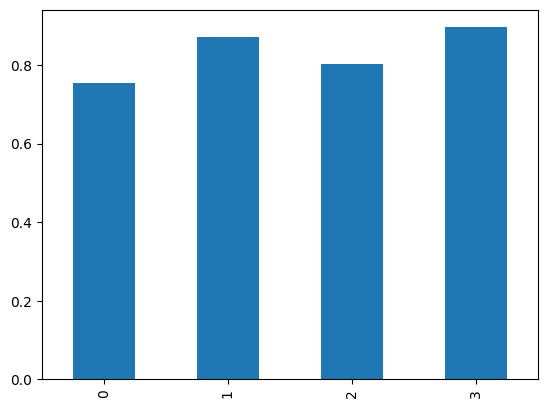

In [ ]:
result_df["acc"].plot.bar()